In [1]:
import warnings
import os
warnings.filterwarnings('ignore')
os.chdir('..')
from scripts.utils import *
from scripts.model import *

In [2]:
preprocess=preprocess(start='2015-01-01',end='2024-10-31')

In [3]:
tesla=preprocess.load_ticker(ticker='TSLA')
tesla.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-02 00:00:00-05:00,14.858000,14.883333,14.217333,14.620667,71466000,0.0,0.0
2015-01-05 00:00:00-05:00,14.303333,14.433333,13.810667,14.006000,80527500,0.0,0.0
2015-01-06 00:00:00-05:00,14.004000,14.280000,13.614000,14.085333,93928500,0.0,0.0
2015-01-07 00:00:00-05:00,14.223333,14.318667,13.985333,14.063333,44526000,0.0,0.0
2015-01-08 00:00:00-05:00,14.187333,14.253333,14.000667,14.041333,51637500,0.0,0.0


In [4]:
vanguard=preprocess.load_ticker(ticker='BND')
vanguard.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2015-01-02 00:00:00-05:00,63.190129,63.389444,63.182461,63.358780,2218800,0.0,0.0,0.0
2015-01-05 00:00:00-05:00,63.427742,63.565729,63.397078,63.542732,5820100,0.0,0.0,0.0
2015-01-06 00:00:00-05:00,63.650061,63.918367,63.650061,63.726719,3887600,0.0,0.0,0.0
2015-01-07 00:00:00-05:00,63.734381,63.841703,63.665390,63.765045,2433400,0.0,0.0,0.0
2015-01-08 00:00:00-05:00,63.711395,63.711395,63.604073,63.665401,1873400,0.0,0.0,0.0


In [5]:
sp=preprocess.load_ticker(ticker='SPY')
sp.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2015-01-02 00:00:00-05:00,173.974595,174.396086,172.120025,173.173752,121465900,0.0,0.0,0.0
2015-01-05 00:00:00-05:00,172.111629,172.280223,169.734426,170.046326,169632600,0.0,0.0,0.0
2015-01-06 00:00:00-05:00,170.358154,170.889237,167.635327,168.444595,209151400,0.0,0.0,0.0
2015-01-07 00:00:00-05:00,169.793402,170.889281,169.338198,170.543655,125346700,0.0,0.0,0.0
2015-01-08 00:00:00-05:00,171.976696,173.789115,171.959846,173.569931,147217800,0.0,0.0,0.0


> Since we're going to forecast the closing price of the stocks, I will only use the `Close` column for training the models.

In [6]:
# Chopping the tesla dataset
tesla=tesla[['Close']]
# Chopping the Vanguard ETF dataset
vanguard=vanguard[['Close']]
# Chopping the S&P 500 dataset
sp=sp[['Close']]

* An ARIMA (Auto Regressive Integrated Moving Average) model has 3 main parameters:
    1. `p` - the order of the AR term 
    2. `d` - the order of differencing required to make the time series dataset stationary
    3. `q` - the order of the MA term 
* As we can see from the definition of the d parameter, A time series can only be modelled using ARIMA models if it is stationary. 
    * **Stationarity** - is when the properties of time series do not depend on the time at which the series is observed. Technically speaking, the variance of the log of the prices increases slower than that of a random walk. Almost all time series aren't stationary. If they were, it would be extremely easy for us to predict the next value of the target variable without even using ML models. But for all forecasting models that use ARIMA models, stationarity is a must. Even though it is assumed most time series aren't stationary, we still need to check if the datasets are stationary or not.

* One good method used for checking the stationarity of price series is **ADF (Augemented Dicker Fuller) test**. 
    - ADF test works by either accepting or rejecting a null hypothesis. **The null hypothesis for an ADF test** is **the time series is non-stationary**. So if we get a p-value that is less than the significance level (0.05), we can easily **reject the null hypothesis** and assume that the time series is indeed stationary

#### train-test split

In [7]:
#num=(tesla.index < len(tesla)-300)
tesla_train=tesla.iloc[:2200]
tesla_test=tesla.iloc[2200:]
vanguard_train=vanguard.iloc[:2200]
vanguard_test=vanguard.iloc[2200:]
sp_train=sp.iloc[:2200]
sp_test=sp.iloc[2200:]
tesla_test

,Close
Date,
2023-09-29 00:00:00-04:00,250.220001
2023-10-02 00:00:00-04:00,251.600006
2023-10-03 00:00:00-04:00,246.529999
2023-10-04 00:00:00-04:00,261.160004
2023-10-05 00:00:00-04:00,260.049988
...,...
2024-10-24 00:00:00-04:00,260.480011
2024-10-25 00:00:00-04:00,269.190002
2024-10-28 00:00:00-04:00,262.510010


#### ADF test

1. For Tesla

In [36]:
adf(tesla_train)

The ADF statistic is -1.1849190324232295
The p-value: 0.6800492873889009


2. For Vanguard ETFs

In [39]:
adf(vanguard_train)

The ADF statistic is -1.2178108082394319
The p-value: 0.6658874100561346


3. For S&P 500 index

In [40]:
adf(sp_train)

The ADF statistic is -0.7775782146028302
The p-value: 0.8256197430177813


- As we can see, the p-value for all 3 dataset is greater than 0.05, which means that we have to **accept the null hypothesis**, which is **all the above time series are non-stationary**. 
- This also means that we need to difference the the time series in order to make it stationary. The amount of differencing depends on the correlation of the lags.
- We can also use other visualization methods to verify that the time series is non-stationary. Some of them are ACF and PACF plots
    * ACF (Auto Correlation Function) plot measures and plots the average correlation between data points in time series and previous values of the series measured for different lag lengths.
    * A PACF (Partial Auto Correlation Function) is similar to an ACF except that each partial correlation controls for any correlation between observations of a shorter lag length.

#### ACF and PACF plot

In [8]:
import seaborn as sns
sns.set_theme('notebook')

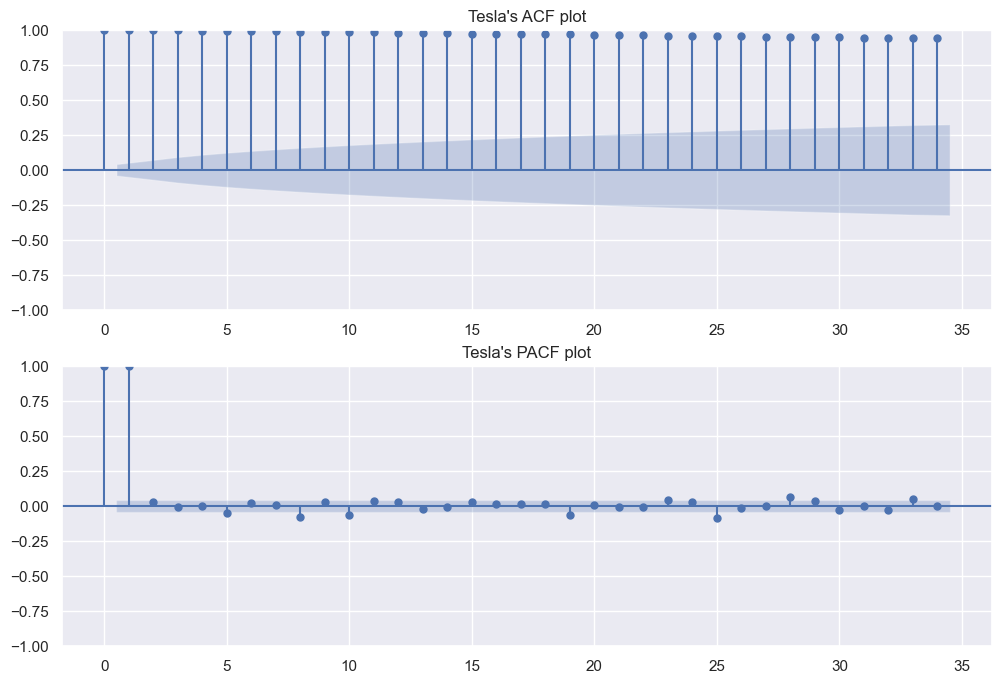

In [80]:
acf_pacf(data=tesla_train,symbol='Tesla')

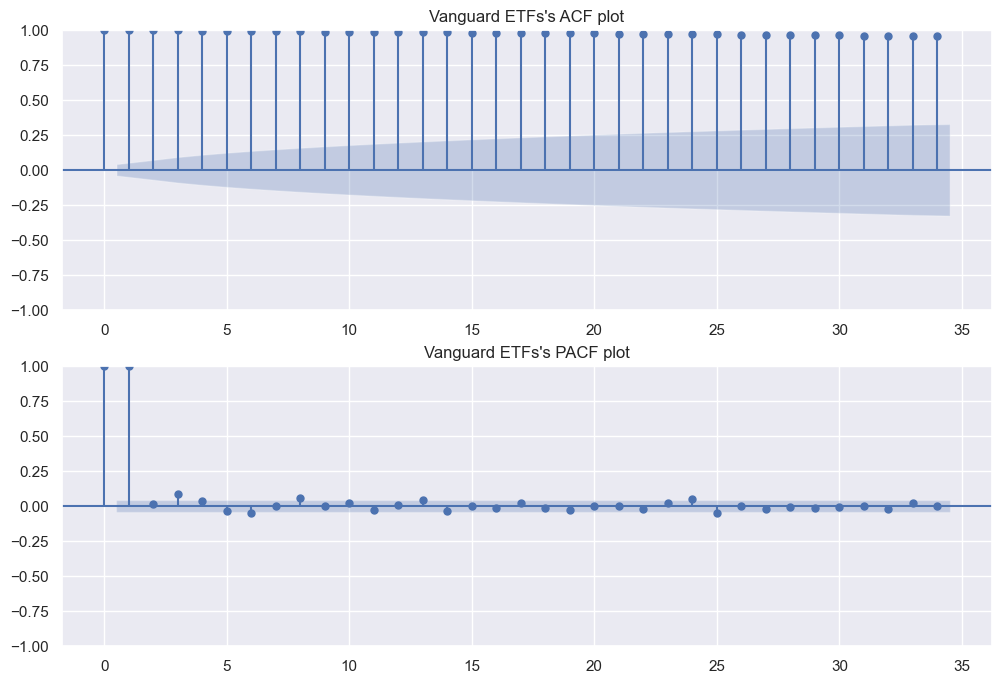

In [81]:
acf_pacf(vanguard_train,'Vanguard ETFs')

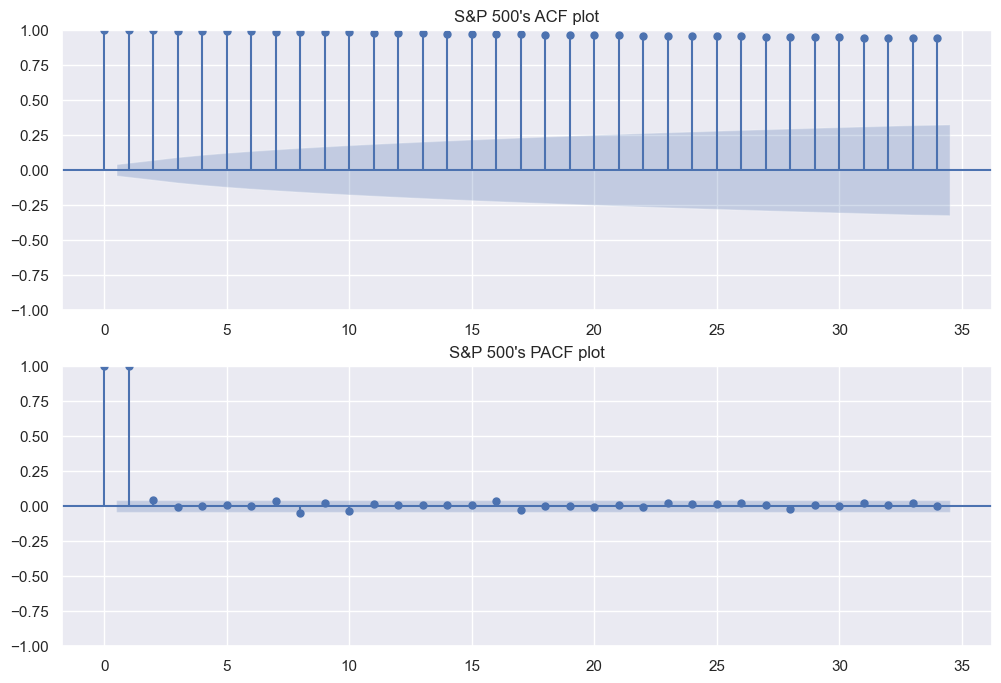

In [82]:
acf_pacf(sp_train,'S&P 500')

* All datasets show a similar distribution in the distribution of lags. 
* The above ACF (Auto Correlation Function) and PACF (Partial Auto Correlation Function) plots can also be used as an evidence for stationary time series. A stationary time series usually shows:
    1. Slow decay - We can see from the ACF graph that the rate of decay is decreasing very slowly as the lags increase. 
    2. No significant spikes - There should be some significant spikes on both ACF and PACF plots for the time series to be stationary. No valuable spike is seen for all 3 datasets.

- The above Correlation Functions plots and the p-value measured using the ADF test are clear indicator that the time series is not stationary. So, we need to difference the time series some n amount of times to make it stationary. 

#### Differencing

* To get how many times we need to difference, we can use the pmdarima package

##### ACF plot for the differencing

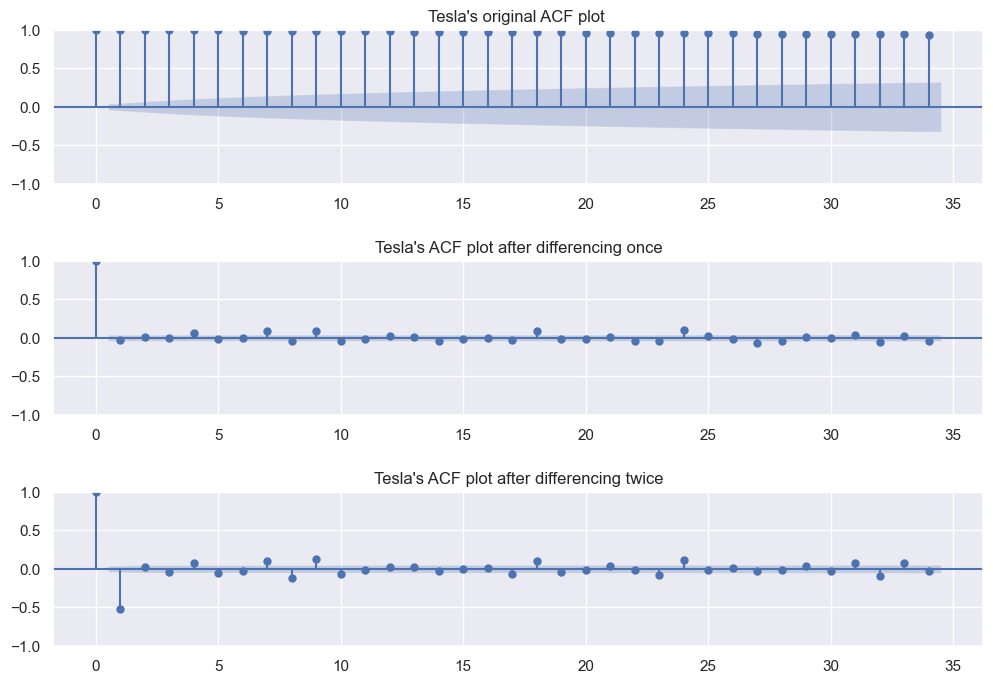

In [86]:
plot_difference(data=tesla_train,symbol='Tesla',type='acf')

- When comparing the first and second difference from the ACF plots, the first lag in the second difference goes far down quicker than the first one. This is not preferable so we'll use the **first difference (d=1)** as our new dataset. 

* The first difference also shows good signs that it is stationary with its really fast decay and higher variation of spikes. Let's check its stationarity using the ADF test

* To find the value of `p`, we need to analyze the appearnce of the lags on the PACF plot. just by looking, we can see that **lag 7** stands outside the significance line and resides in the positive side of the line. so, we can take **p=7** as our p parameter

To find the `q` parameter, we can look at the ACF plot. **lag 4** is a bit more significant than the other so we'll take **q=4**

#### Checking the stationarity of the first differenced datasets

In [89]:
#Using the first difference
tesla_diff=pd.DataFrame(tesla_train['Close'].diff().dropna())
vanguard_diff=pd.DataFrame(vanguard_train['Close'].diff().dropna())
sp_diff=pd.DataFrame(sp_train['Close'].diff().dropna())

In [90]:
adf(tesla_diff)

The ADF statistic is -8.945766537375308
The p-value: 8.997783004265908e-15


In [91]:
adf(vanguard_diff)

The ADF statistic is -9.553901173866644
The p-value: 2.52886849934654e-16


In [92]:
adf(sp_diff)

The ADF statistic is -14.575645872418288
The p-value: 4.55366893313862e-27


* The p-values are extremely less than the significance level (0.05). Although the p-values are low enough to raise some suspitions, they is still enough to **reject the null hypothesis**. So we can confidently day that the **all the time series is Stationary**.

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
tesla[['Close']]=scaler.fit_transform(tesla[['Close']])
tesla_train[['Close']]=scaler.fit_transform(tesla_train[['Close']])
tesla_test[['Close']]=scaler.fit_transform(tesla_test[['Close']])

In [11]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(tesla_train['Close'],order=(1,1,0))
result=model.fit()

c:\Users\hp\Desktop\Trial\Portfolio-Management\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\Desktop\Trial\Portfolio-Management\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\Desktop\Trial\Portfolio-Management\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [12]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2200
Model:                 ARIMA(1, 1, 0)   Log Likelihood                6237.764
Date:                Mon, 11 Nov 2024   AIC                         -12471.528
Time:                        07:08:05   BIC                         -12460.136
Sample:                             0   HQIC                        -12467.365
                               - 2200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0373      0.012     -3.014      0.003      -0.062      -0.013
sigma2         0.0002   2.27e-06     88.822      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             14345.93
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):             564.58   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: title={'center': 'Density'}, ylabel='Density'>

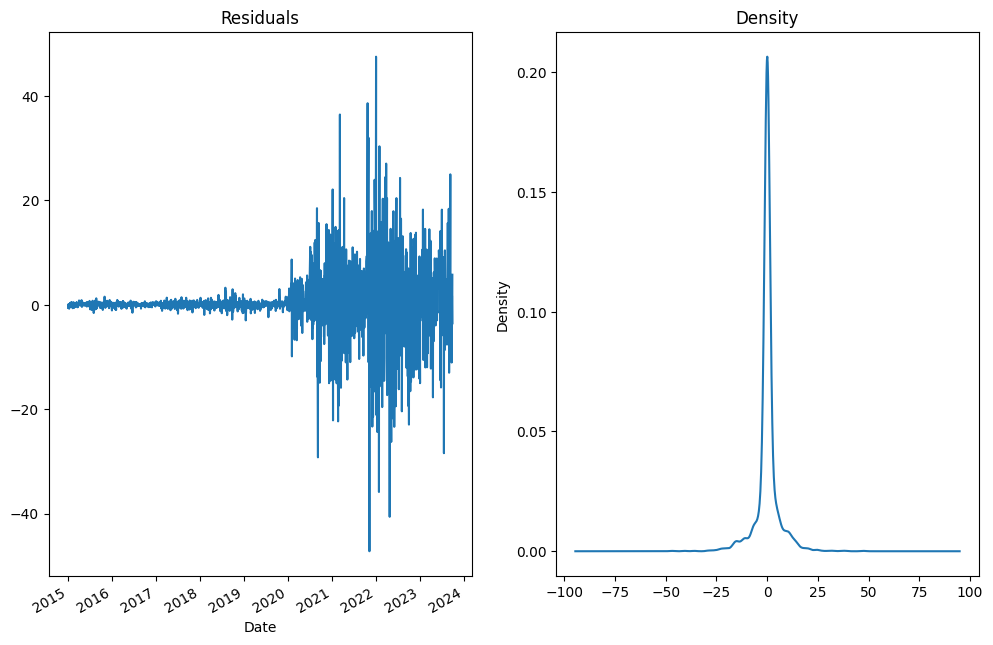

In [10]:
residuals=result.resid[1:]
fig,ax=plt.subplots(1,2,figsize=(12,8))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])

In [13]:
forecast=result.forecast(len(tesla_test))
tesla['forecasted'] = [None]*len(tesla_train) + list(forecast)

c:\Users\hp\Desktop\Trial\Portfolio-Management\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [14]:
import pmdarima as pm
auto=pm.auto_arima(tesla_train['Close'],seasonal=False,stepwise=False)
auto

ARIMA(order=(0, 1, 5), scoring_args={}, suppress_warnings=True)

c:\Users\hp\Desktop\Trial\Portfolio-Management\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

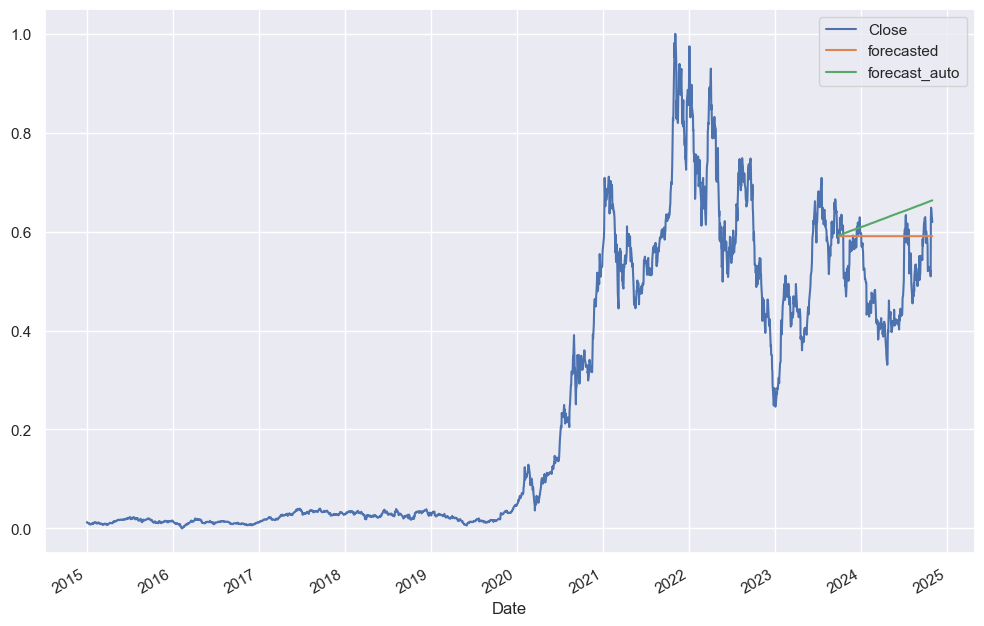

In [15]:
forecast_auto=auto.predict(n_periods=len(tesla_test))
tesla['forecast_auto']= [None]*len(tesla_train) + list(forecast_auto)

tesla.plot(figsize=(12,8))

In [16]:
auto_sarima=pm.auto_arima(tesla_train['Close'],seasonal=True, m=5,
                                  start_p=0, start_q=0, max_p=3, max_q=3, d=1, D=1,
                                  trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[5]             : AIC=inf, Time=2.99 sec
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=-10862.444, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=-11485.212, Time=0.82 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=2.78 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=-10870.290, Time=0.27 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=-11738.332, Time=1.63 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=3.96 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=2.53 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=-11736.164, Time=1.20 sec
 ARIMA(2,1,0)(2,1,0)[5]             : AIC=-11737.155, Time=1.57 sec
 ARIMA(1,1,1)(2,1,0)[5]             : AIC=-11735.475, Time=2.20 sec
 ARIMA(0,1,1)(2,1,0)[5]             : AIC=-11738.180, Time=1.02 sec
 ARIMA(2,1,1)(2,1,0)[5]             : AIC=-11739.519, Time=4.18 sec
 ARIMA(2,1,1)(1,1,0)[5]             : AIC=-11482.573, Time=1.40 sec
 ARIMA(2,1,1)(2,1,1)[5]          

c:\Users\hp\Desktop\Trial\Portfolio-Management\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='Date'>

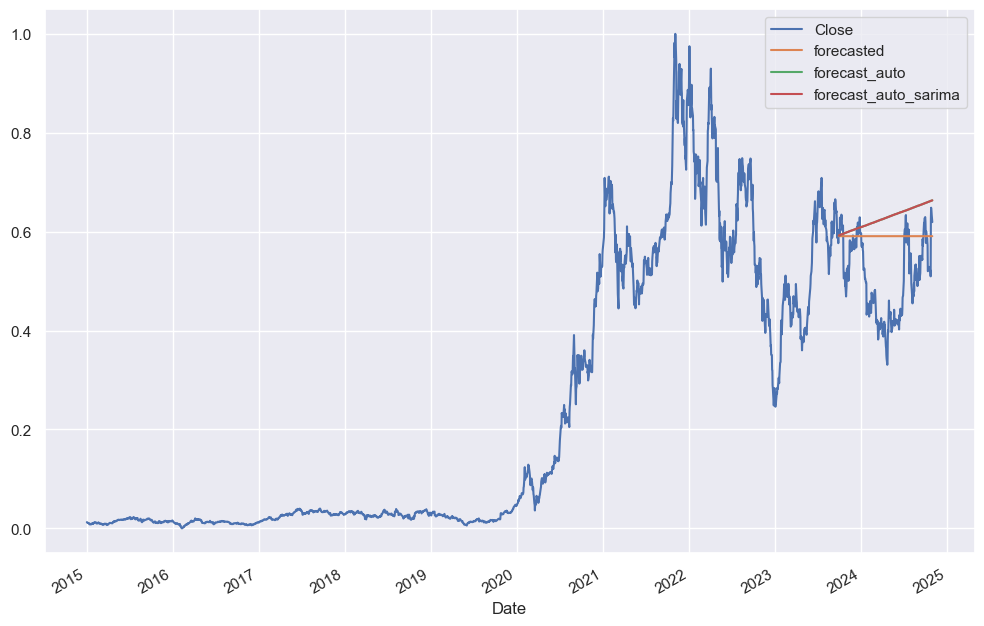

In [17]:
forecast_auto_sarima=auto_sarima.predict(n_periods=len(tesla_test))
tesla['forecast_auto_sarima']= [None]*len(tesla_train) + list(forecast_auto)

tesla.plot(figsize=(12,8))

In [18]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import numpy as np
mae = mean_absolute_error(tesla_test['Close'], forecast_auto)
mape = mean_absolute_percentage_error(tesla_test['Close'], forecast_auto)
rmse = np.sqrt(mean_squared_error(tesla_test['Close'], forecast_auto))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 0.22199478765318711
mape - manual: 10335119738284.127
rmse - manual: 0.2589877028725145


In [78]:
tesla_copy=tesla.copy()
tesla_copy=tesla_copy.reset_index()
msk = (tesla_copy.index < len(tesla_copy)-300)
df_train = tesla_copy[msk].copy()
df_test = tesla_copy[~msk].copy()
df_test

,Date,Close,forecasted,forecast_auto
2174,2023-08-23 00:00:00-04:00,236.860001,-0.020782,193.949757
2175,2023-08-24 00:00:00-04:00,230.039993,-0.021097,194.032321
2176,2023-08-25 00:00:00-04:00,238.589996,-0.021131,194.114868
2177,2023-08-28 00:00:00-04:00,238.820007,-0.020813,194.197422
2178,2023-08-29 00:00:00-04:00,257.179993,-0.021102,194.279983
...,...,...,...,...
2469,2024-10-24 00:00:00-04:00,260.480011,-0.021011,218.303303
2470,2024-10-25 00:00:00-04:00,269.190002,-0.021011,218.385857
2471,2024-10-28 00:00:00-04:00,262.510010,-0.021011,218.468412
2472,2024-10-29 00:00:00-04:00,259.519989,-0.021011,218.550966


In [19]:
def _create_sequence(data, seq_length=60):
        """Create sequences of data for LSTM."""
        xs, ys = [], []
        for i in range(len(data) - seq_length):
            x = data[i:i + seq_length]
            y = data[i + seq_length]
            xs.append(x)
            ys.append(y)
        return np.array(xs), np.array(ys)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
data = tesla_train['Close'].values.reshape(-1, 1)

            
X_train, y_train = _create_sequence(data, 60)
            
model = Sequential()
model.add(Input(shape=(60, 1)))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()  # Print model summary
            
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train,y_train, epochs=30, batch_size=32,
    validation_split=0.1, verbose=1
        )

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                  │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 40)             │        14,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,001 (97.66 KB)

 Trainable params: 25,001 (97.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0513 - val_loss: 0.0042
Epoch 2/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0055 - val_loss: 0.0043
Epoch 3/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 4/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 5/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 6/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 7/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 8/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0027 - val_loss: 0.0023
Epoch 9/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 10/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 11/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 12/30
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0

In [61]:
predictions=[]
data = np.array(tesla_train['Close'].values[-60:].reshape(-1, 1))
for i in range(len(tesla_test)+180):
    pred = model.predict(data.reshape(1, 60, 1))
    predictions.append(pred[0, 0])
    data = np.append(data[1:], pred[0, 0]).reshape(-1, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━

<Axes: xlabel='Date'>

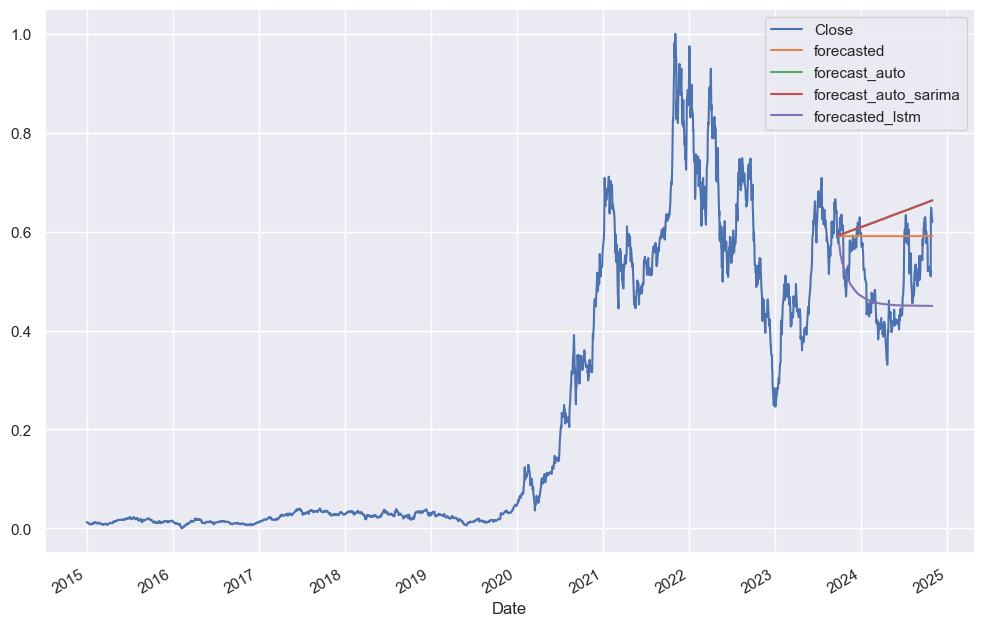

In [57]:
tesla['forecasted_lstm']=[None]*len(tesla_train) + list(predictions)
tesla.plot(figsize=(12,8))

In [58]:
mae = mean_absolute_error(tesla_test['Close'], predictions)
mape = mean_absolute_percentage_error(tesla_test['Close'], predictions)
rmse = np.sqrt(mean_squared_error(tesla_test['Close'], predictions))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 0.21324411620998185
mape - manual: 7442003673925.712
rmse - manual: 0.24943328909195314


<Axes: >

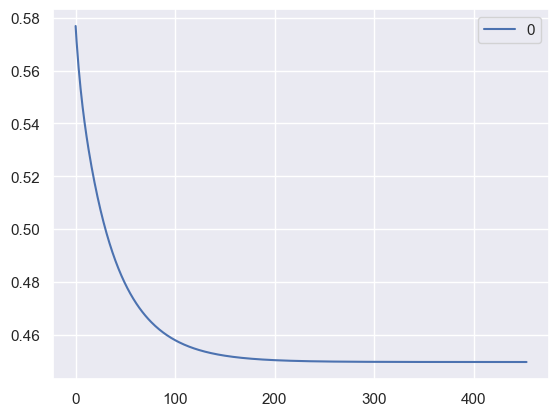

In [66]:
pd.DataFrame(predictions).plot()